## 1. Descripción del caso

In [56]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np

# Lectura de datos
datos = pd.read_csv("HRAnalytics.csv", sep=",", decimal=".")

# Inspeccionando la estructura de los datos
info_data = {
    'Columnas': datos.columns,
    'Tipo de Dato': datos.dtypes,
    'Valores Nulos': datos.isnull().sum(),
    'Valores No Nulos': datos.notnull().sum()
}

# Creando el DataFrame
estructura_datos = pd.DataFrame(info_data)

# Aplicando estilo para la visualización
estructura_datos.style.set_caption("Estructura de Datos del Archivo 'HRAnalytics.csv'") \
                      .set_properties(**{'text-align': 'center'}) \
                      .set_table_styles([{
                          'selector': 'th',
                          'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'), 
                                    ('background-color', '#4CAF50')]
                      }, {
                          'selector': 'td',
                          'props': [('font-size', '12px')]
                      }])

,Columnas,Tipo de Dato,Valores Nulos,Valores No Nulos
employee_id,employee_id,int64,0,54808
department,department,object,0,54808
region,region,object,0,54808
education,education,object,2409,52399
gender,gender,object,0,54808
recruitment_channel,recruitment_channel,object,0,54808
no_of_trainings,no_of_trainings,int64,0,54808
age,age,int64,0,54808
previous_year_rating,previous_year_rating,float64,4124,50684
length_of_service,length_of_service,int64,0,54808


In [57]:
# Vista general de los primeros 10 elementos
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', 10)       # Muestra hasta 10 filas
print("\nPrimeros 10 elementos de los datos:")
datos.head(10)


Primeros 10 elementos de los datos:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [58]:
# Detectando los valores duplicados con ayuda de en la columna 'employee_id'
unique_ids = datos['employee_id'].nunique()
print(f'Número de IDs únicos: {unique_ids}')

Número de IDs únicos: 54808


In [59]:
# Eliminamos la variable 'employee_id' ya que no es de interés
datos.drop('employee_id', axis=1, inplace=True)

In [60]:
# Convertimos la variable target a tipo categoría
datos['is_promoted'] = datos['is_promoted'].astype('category')

In [61]:
# Revisamos el orden de las observaciones negativas y positivas
print(datos['is_promoted'].cat.categories)

Int64Index([0, 1], dtype='int64')


In [62]:
# Renombramos las categorías del target
datos['is_promoted'].cat.rename_categories(['NO_PROMOVIDO', 'PROMOVIDO'], inplace=True)

C:\Users\51986\AppData\Local\Temp\ipykernel_31236\3807982342.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  datos['is_promoted'].cat.rename_categories(['NO_PROMOVIDO', 'PROMOVIDO'], inplace=True)


In [63]:
# Evaluando la variable target 'is_promoted'

# Calculando las frecuencias y porcentajes
conteo = datos['is_promoted'].value_counts()
porcentaje = datos['is_promoted'].value_counts(normalize=True) * 100

# Creando un DataFrame para mostrar ambos resultados en un cuadro
resultado = pd.DataFrame({'Frecuencia': conteo, 'Porcentaje (%)': porcentaje})

# Aplicando formato para la visualización
resultado.style.format({'Porcentaje (%)': '{:.2f}%'}) \
               .set_caption("Distribución de la Variable Target 'is_promoted'") \
               .set_properties(**{'text-align': 'center'}) \
               .set_table_styles([{
                   'selector': 'th',
                   'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'), 
                             ('background-color', '#4CAF50')]
               }, {
                   'selector': 'td',
                   'props': [('font-size', '12px')]
               }])

,Frecuencia,Porcentaje (%)
NO_PROMOVIDO,50140,91.48%
PROMOVIDO,4668,8.52%


- El porcentaje de nuestra variable target nos indica que debemos hacer un balanceo previo ya que supera el 9:1 con 91.48% para los no promovidos y un 8.52% para los promovidos. Tambien podemos ver que nuestro éxito será encontrar los "PROMOVIDO"

## 2. Detección de datos perdidos o valores faltantes

<Axes: >

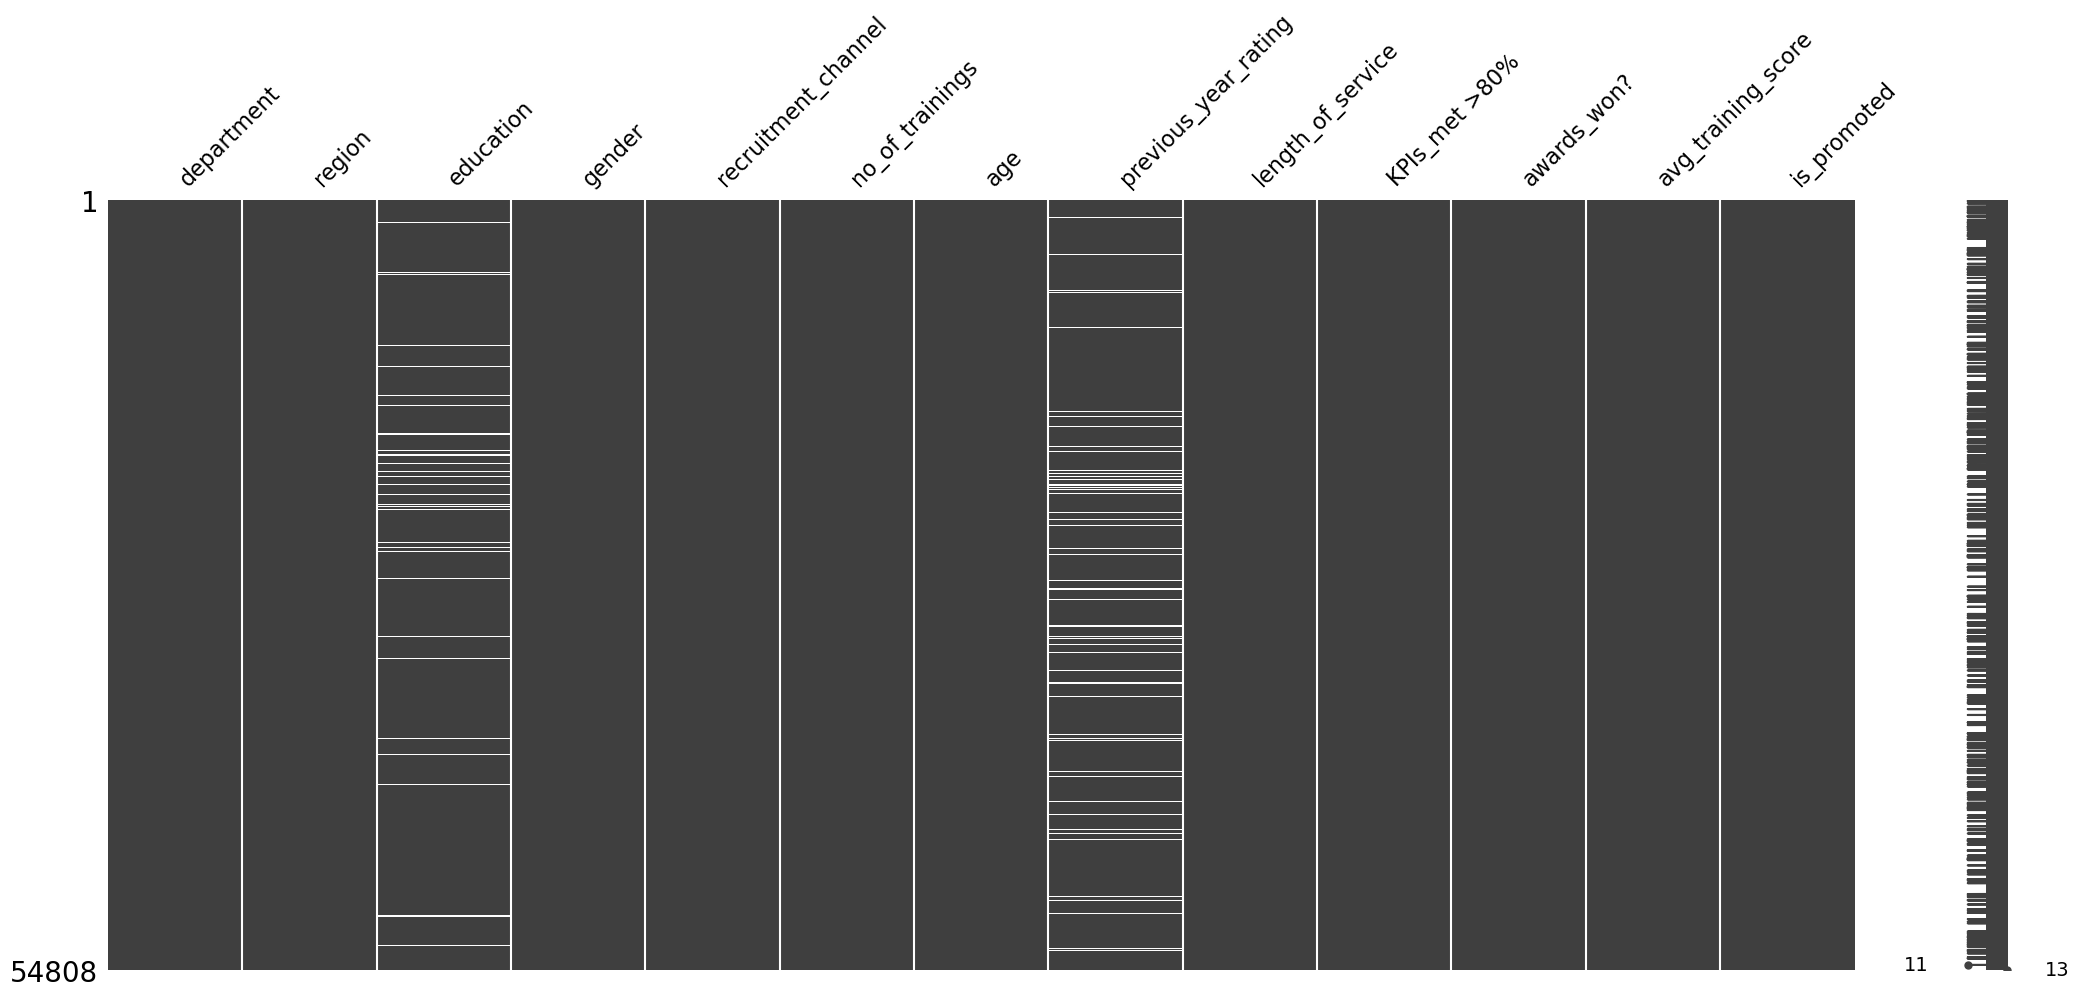

In [64]:
import missingno as msno

# Visualización de datos perdidos
msno.matrix(datos)

In [65]:
# Número de registros con datos perdidos por variable
pd.set_option('display.max_rows', None) # Muestra todas las columnas
pd.set_option('display.max_rows', None) # Muestra todas las filas
datos.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

## 3. Preprocesamiento de datos

### Analizando la naturaleza de las variables "previous_year_rating" y "education" antes de ser imputadas

In [66]:
# Conteo de valores en la columna 'education'
education_counts = datos['education'].value_counts(dropna=False)

# Creando un DataFrame
education_df = pd.DataFrame({'Frecuencia': education_counts})

# Aplicando estilo para la visualización
education_df.style.set_caption("Distribución de la Variable 'education'") \
                  .set_properties(**{'text-align': 'center'}) \
                  .set_table_styles([{
                      'selector': 'th',
                      'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'), 
                                ('background-color', '#4CAF50')]
                  }, {
                      'selector': 'td',
                      'props': [('font-size', '12px')]
                  }])

,Frecuencia
Bachelor's,36669
Master's & above,14925
nan,2409
Below Secondary,805


- Viendo la naturaleza de la variable no podemos hacer uso de alguna imputación ya que el NaN es por falta de educación no por un valor sin completar, entonces el NaN la consideraremos como otro categoría.

In [67]:
# Conteo de valores en la columna 'previous_year_rating'
rating_counts = datos['previous_year_rating'].value_counts(dropna=False)

# Creando un DataFrame
rating_df = pd.DataFrame({'Frecuencia': rating_counts})

# Aplicando estilo para la visualización
rating_df.style.set_caption("Distribución de la Variable 'previous_year_rating'") \
               .set_properties(**{'text-align': 'center'}) \
               .set_table_styles([{
                   'selector': 'th',
                   'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'), 
                             ('background-color', '#4CAF50')]
               }, {
                   'selector': 'td',
                   'props': [('font-size', '12px')]
               }])

,Frecuencia
3.000000,18618
5.000000,11741
4.000000,9877
1.000000,6223
2.000000,4225
nan,4124


- Al analizar esta variable notamos que esos NaN provienen de colaboradores que tienen solo un año trabajando en la empresa, lo que los excluye de tener un rating, no podemos hacer una imputación numérica, pero lo que si podemos hacer es crear una nueva categoría.

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


<Axes: >

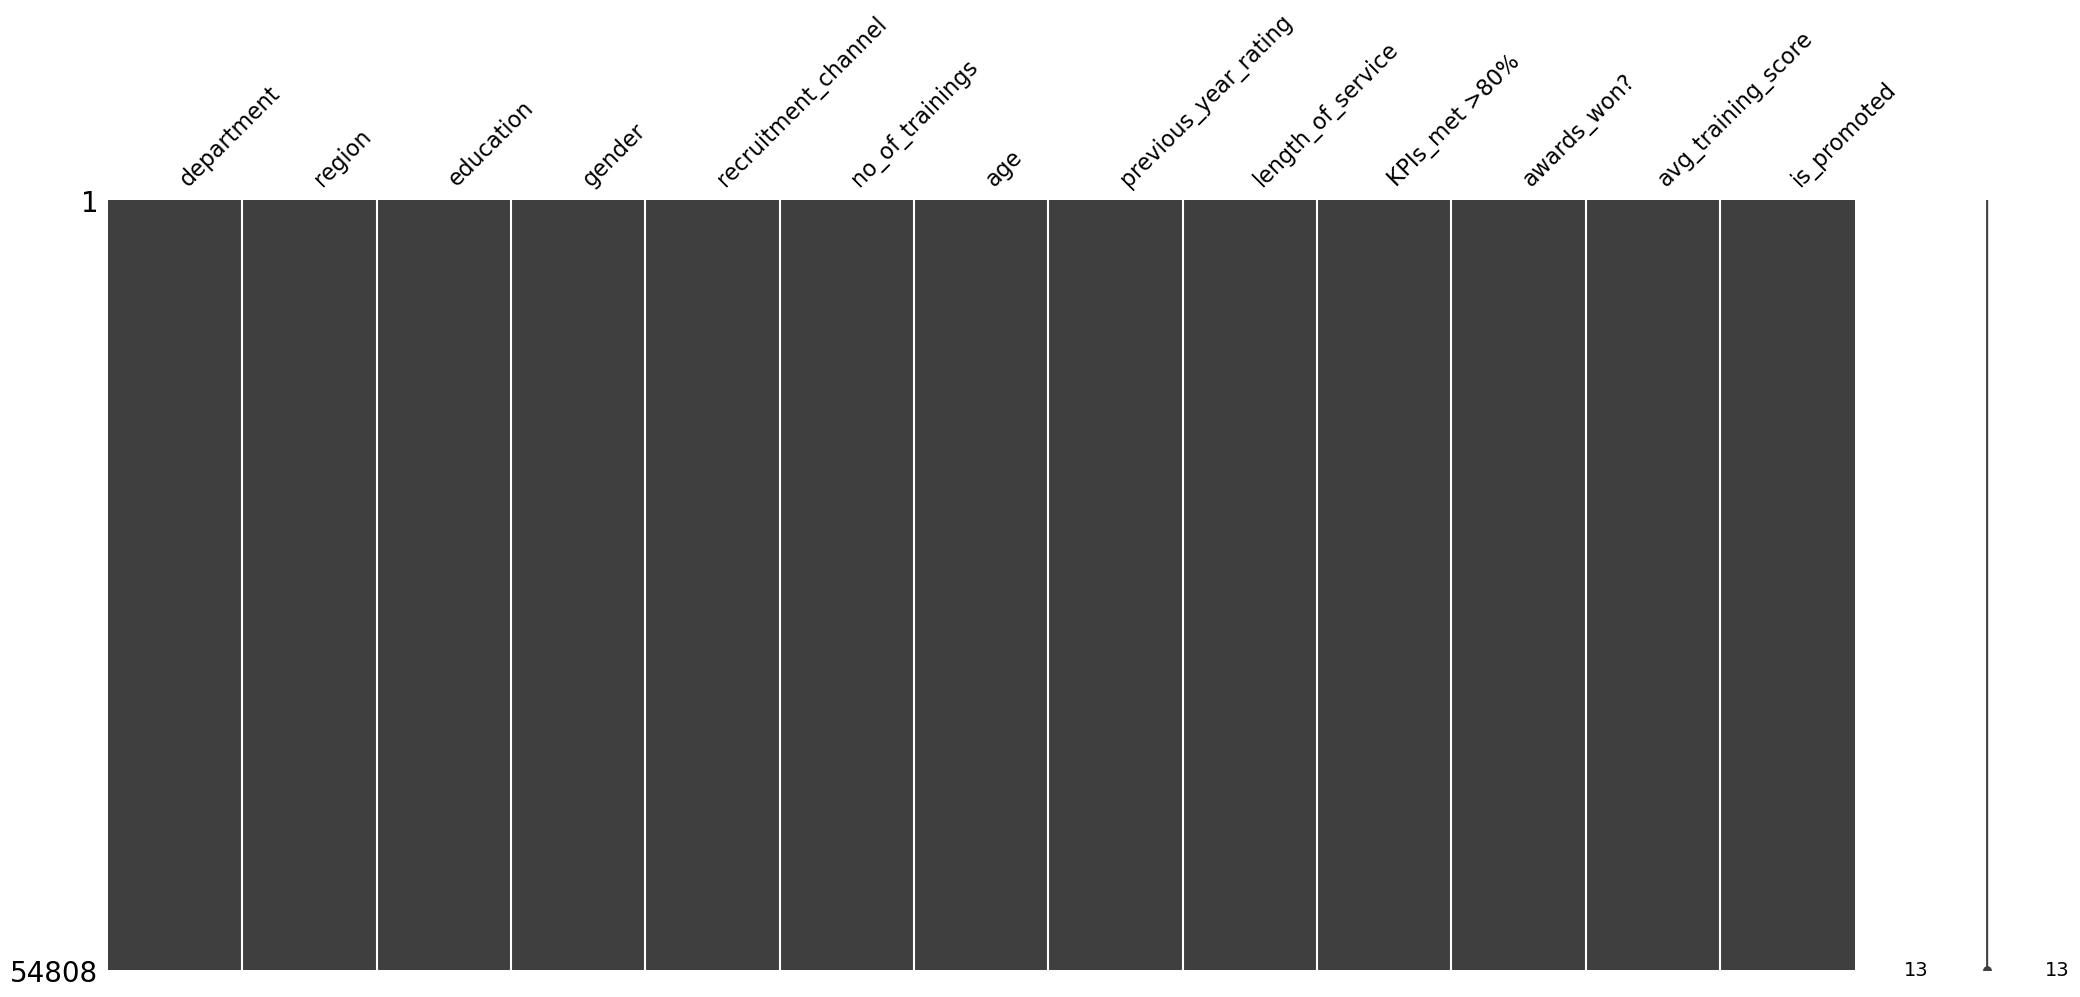

In [68]:
# Creamos una copia del data set donde tendremos la base de datos imputada
datos_transformado = datos.copy()

# Reemplazamos los "NaN" de la variable education por la categoría "Sin_información"
datos_transformado['education'] = datos_transformado['education'].fillna('Sin_información')

# Reemplazamos los "NaN" de la variable previous_year_rating por la categoría "0"
datos_transformado['previous_year_rating']  = datos_transformado['previous_year_rating'].fillna('0')

print(datos_transformado.isnull().sum())

msno.matrix(datos_transformado)

In [69]:
# Vista general de los primeros 4 elementos
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', 4)       # Muestra hasta 4 filas
print("\nPrimeros 4 elementos de los datos:")
datos_transformado.head(4)


Primeros 4 elementos de los datos:


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,NO_PROMOVIDO
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,NO_PROMOVIDO
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,NO_PROMOVIDO
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,NO_PROMOVIDO


### Identificando variables con varianza cero o casi cero

In [70]:
from sklearn.feature_selection import VarianceThreshold

# Inicializamos el selector para identificar variables con varianza baja
selector = VarianceThreshold(threshold=0.01)
selector.fit(datos_transformado.select_dtypes(include=[np.number]))

# Identificamos las columnas que se eliminarán
low_variance_features = [column for column, keep in zip(datos_transformado.select_dtypes(include=[np.number]).columns, selector.get_support()) if not keep]
print("Variables con baja varianza:", low_variance_features)

# Eliminamos las columnas de baja varianza identificadas
datos_transformado.drop(columns=low_variance_features, inplace=True)

Variables con baja varianza: []


- No se identifico ninguna variable con baja varianza como para eliminarse, asi que continuamos.

### Normalización de las variables numéricas.

In [71]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos las columnas numéricas para normalizarlas
numerical_columns = ['no_of_trainings','age','previous_year_rating','length_of_service', 'KPIs_met >80%', 
                     'awards_won?','avg_training_score']

# Inicializamos el escalador Min-Max
scaler = MinMaxScaler()

# Aplicamos la normalización
datos_transformado[numerical_columns] = scaler.fit_transform(datos_transformado[numerical_columns])

# Verificamos el resumen de las variables normalizadas
print(datos_transformado[numerical_columns].describe())

       no_of_trainings           age  previous_year_rating  length_of_service  \
count     54808.000000  54808.000000           54808.00000       54808.000000   
mean          0.028112      0.370098               0.61575           0.135153   
...                ...           ...                   ...                ...   
75%           0.000000      0.475000               0.80000           0.166667   
max           1.000000      1.000000               1.00000           1.000000   

       KPIs_met >80%   awards_won?  avg_training_score  
count   54808.000000  54808.000000        54808.000000  
mean        0.351974      0.023172            0.406446  
...              ...           ...                 ...  
75%         1.000000      0.000000            0.616667  
max         1.000000      1.000000            1.000000  

[8 rows x 7 columns]


- Para normalizar variables usualmente se seleccionan variables numéricas continuas, pero en este caso normalizaremos todas para mejorar la interpretación.

### Creando variables dummies

In [72]:
# Creación de variables dummies para las variables categóricas seleccionadas
datos_transformado = pd.get_dummies(datos_transformado, columns=['department', 'region', 'education', 
                                                                 'gender', 'recruitment_channel'], 
                                    drop_first=True)

# Verificamos la estructura después de crear las dummies
datos_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   no_of_trainings               54808 non-null  float64 
 1   age                           54808 non-null  float64 
 2   previous_year_rating          54808 non-null  float64 
 3   length_of_service             54808 non-null  float64 
 4   KPIs_met >80%                 54808 non-null  float64 
 5   awards_won?                   54808 non-null  float64 
 6   avg_training_score            54808 non-null  float64 
 7   is_promoted                   54808 non-null  category
 8   department_Finance            54808 non-null  uint8   
 9   department_HR                 54808 non-null  uint8   
 10  department_Legal              54808 non-null  uint8   
 11  department_Operations         54808 non-null  uint8   
 12  department_Procurement        54808 non-null  

In [73]:
# Vista general de los primeros 4 elementos
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', 4)       # Muestra hasta 4 filas
print("\nPrimeros 4 elementos de los datos:")
datos_transformado.head(4)


Primeros 4 elementos de los datos:


,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,education_Sin_información,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,NO_PROMOVIDO,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,NO_PROMOVIDO,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.000000,0.350,0.6,0.166667,0.0,0.0,0.183333,NO_PROMOVIDO,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,0.111111,0.475,0.2,0.250000,0.0,0.0,0.183333,NO_PROMOVIDO,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Identificando predictores correlacionados

In [74]:
import pandas as pd
import numpy as np

# Calculamos la matriz de correlación para las columnas de interés
descr_cor = datos_transformado.iloc[:, :7].corr()

# Extraemos la parte superior de la matriz de correlación (similar a 'upper.tri' en R)
upper_tri = descr_cor.where(np.triu(np.ones(descr_cor.shape), k=1).astype(bool))

# Resumen de los valores de correlación
correlation_values = upper_tri.stack()
print("Resumen de los valores de correlación:")
print(correlation_values.describe())

Resumen de los valores de correlación:
count    21.000000
mean      0.056061
           ...    
75%       0.078391
max       0.657111
Length: 8, dtype: float64


In [77]:
# Encontrando las columnas con alta correlación (similar a 'findCorrelation' en R)
threshold = 0.40
high_corr = [column for column in upper_tri.columns if any(upper_tri[column].abs() > threshold)]

# Mostramos las variables con alta correlación
print("\nVariables con alta correlación:")
print(high_corr)


Variables con alta correlación:
['length_of_service']


- Al encontrarse que la varible 'length_of_service' tiene alta correlación, entonces debera ser eliminada.

In [78]:
# Eliminamos la columna 'length_of_service' ya que se encuentra en la lista de alta correlación
if 'length_of_service' in high_corr:
    datos_transformado.drop(columns='length_of_service', inplace=True)
    print("\nColumna 'length_of_service' eliminada.")
else:
    print("\nColumna 'length_of_service' no está altamente correlacionada y no fue eliminada.")

# Verificamos la estructura del DataFrame después de la eliminación
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', 4)       # Muestra hasta 4 filas
print("\nPrimeros 4 elementos de los datos:")
datos_transformado.head(4)


Columna 'length_of_service' eliminada.

Primeros 4 elementos de los datos:


,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,education_Sin_información,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0.000000,0.375,1.0,1.0,0.0,0.166667,NO_PROMOVIDO,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,0.000000,0.250,1.0,0.0,0.0,0.350000,NO_PROMOVIDO,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.000000,0.350,0.6,0.0,0.0,0.183333,NO_PROMOVIDO,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,0.111111,0.475,0.2,0.0,0.0,0.183333,NO_PROMOVIDO,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Selección de muestra de entrenamiento (80%) y de evaluación (20%)

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Selección de muestra de entrenamiento (80%) y de evaluación (20%)
# Configuramos la semilla para la reproducibilidad
np.random.seed(2024)

# Dividimos el dataset en entrenamiento (80%) y evaluación (20%)
X = datos_transformado.drop(columns='is_promoted')
y = datos_transformado['is_promoted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2024)

# Calculando las frecuencias y porcentajes de las clases en el dataset original
original_counts = y.value_counts()
original_percent = round(y.value_counts(normalize=True) * 100, 2)

# Calculando las frecuencias y porcentajes de las clases en el conjunto de entrenamiento
train_counts = y_train.value_counts()
train_percent = round(y_train.value_counts(normalize=True) * 100, 2)

# Calculando las frecuencias y porcentajes de las clases en el conjunto de prueba
test_counts = y_test.value_counts()
test_percent = round(y_test.value_counts(normalize=True) * 100, 2)

# Creando DataFrames para cada conjunto
original_df = pd.DataFrame({'Frecuencia': original_counts, 'Porcentaje (%)': original_percent})
train_df = pd.DataFrame({'Frecuencia': train_counts, 'Porcentaje (%)': train_percent})
test_df = pd.DataFrame({'Frecuencia': test_counts, 'Porcentaje (%)': test_percent})

# Aplicando estilo visual a cada cuadro
def estilizar_tabla(df, titulo):
    return (df.style.set_caption(titulo)
                 .format({'Porcentaje (%)': '{:.2f}%'})
                 .set_properties(**{'text-align': 'center'})
                 .set_table_styles([{
                     'selector': 'th',
                     'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'), 
                               ('background-color', '#4CAF50')]
                 }, {
                     'selector': 'td',
                     'props': [('font-size', '12px')]
                 }]))

In [80]:
estilizar_tabla(original_df, "Distribución de Clases en el Dataset Original")

,Frecuencia,Porcentaje (%)
NO_PROMOVIDO,50140,91.48%
PROMOVIDO,4668,8.52%


In [81]:
estilizar_tabla(train_df, "Distribución de Clases en el Conjunto de Entrenamiento")

,Frecuencia,Porcentaje (%)
NO_PROMOVIDO,40112,91.48%
PROMOVIDO,3734,8.52%


In [82]:
estilizar_tabla(test_df, "Distribución de Clases en el Conjunto de Prueba")

,Frecuencia,Porcentaje (%)
NO_PROMOVIDO,10028,91.48%
PROMOVIDO,934,8.52%


- En este caso tenemos un porcentaje igual para el entrenamiento y prueba entonces podemos continuar sin problemas.

## 4. Balanceo

### Balanceo con Borderline-SMOTE

In [83]:
from imblearn.over_sampling import BorderlineSMOTE

# Configuración de Borderline-SMOTE
borderline_smote = BorderlineSMOTE(sampling_strategy='auto', random_state=2024, kind='borderline-1')

# Aplicar Borderline-SMOTE al conjunto de datos de entrenamiento
X_train_border, y_train_border = borderline_smote.fit_resample(X_train, y_train)

# Calculando las frecuencias y porcentajes de las clases después de aplicar Borderline-SMOTE
border_counts = y_train_border.value_counts()
border_percent = round(y_train_border.value_counts(normalize=True) * 100, 2)

# Creando un DataFrame para la distribución de clases después de Borderline-SMOTE
borderline_df = pd.DataFrame({'Frecuencia': border_counts, 'Porcentaje (%)': border_percent})

# Aplicando estilo visual al cuadro
def estilizar_tabla(df, titulo):
    return (df.style.set_caption(titulo)
                 .format({'Porcentaje (%)': '{:.2f}%'})
                 .set_properties(**{'text-align': 'center'})
                 .set_table_styles([{
                     'selector': 'th',
                     'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'), 
                               ('background-color', '#4CAF50')]
                 }, {
                     'selector': 'td',
                     'props': [('font-size', '12px')]
                 }]))

# Mostrar el cuadro estilizado
estilizar_tabla(borderline_df, "Distribución de Clases después de aplicar Borderline-SMOTE")

,Frecuencia,Porcentaje (%)
NO_PROMOVIDO,40112,50.00%
PROMOVIDO,40112,50.00%


## 5. Modelado

### 5.1. Modelo con Regresión Logistica

In [84]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Configuración y entrenamiento del modelo Regresión Logistica
log_reg_border = LogisticRegression(max_iter=1000)
log_reg_border.fit(X_train_border, y_train_border)
y_pred_border = cross_val_predict(log_reg_border, X, y, cv=10)

# Matriz de confusión
cm_border = confusion_matrix(y, y_pred_border)

# Cálculo de métricas
sensitivity_border = recall_score(y, y_pred_border, pos_label='PROMOVIDO')
specificity_border = cm_border[0, 0] / sum(cm_border[0, :])
accuracy_border = accuracy_score(y, y_pred_border)
balanced_accuracy_border = (sensitivity_border + specificity_border) / 2

# Mostrar resultados
print("\nResultados con Regresión Logistica:")
print("Matriz de Confusión:\n", cm_border)
print(f"Sensibilidad: {sensitivity_border:.4f}")
print(f"Especificidad: {specificity_border:.4f}")
print(f"Accuracy: {accuracy_border:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_border:.4f}")


Resultados con Regresión Logistica:
Matriz de Confusión:
 [[49943   197]
 [ 3590  1078]]
Sensibilidad: 0.2309
Especificidad: 0.9961
Accuracy: 0.9309
Balanced Accuracy: 0.6135


### 5.2. Modelo con K-Vecinos más cercanos (K-NN)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score

# Configuración y entrenamiento del modelo K-NN
knn_border = KNeighborsClassifier(n_neighbors=5)
knn_border.fit(X_train_border, y_train_border)
y_pred_knn = cross_val_predict(knn_border, X, y, cv=10)

# Matriz de confusión
cm_knn = confusion_matrix(y, y_pred_knn)

# Cálculo de métricas
sensitivity_knn = recall_score(y, y_pred_knn, pos_label='PROMOVIDO')
specificity_knn = cm_knn[0, 0] / sum(cm_knn[0, :])
accuracy_knn = accuracy_score(y, y_pred_knn)
balanced_accuracy_knn = (sensitivity_knn + specificity_knn) / 2

# Mostrar resultados
print("\nResultados con K-Nearest Neighbors (K-NN):")
print("Matriz de Confusión:\n", cm_knn)
print(f"Sensibilidad: {sensitivity_knn:.4f}")
print(f"Especificidad: {specificity_knn:.4f}")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_knn:.4f}")


Resultados con K-Nearest Neighbors (K-NN):
Matriz de Confusión:
 [[49535   605]
 [ 4271   397]]
Sensibilidad: 0.0850
Especificidad: 0.9879
Accuracy: 0.9110
Balanced Accuracy: 0.5365


### 5.3. Modelo con Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB

# Configuración y entrenamiento del modelo Naive Bayes
nb_border = GaussianNB()
nb_border.fit(X_train_border, y_train_border)
y_pred_nb = cross_val_predict(nb_border, X, y, cv=10)

# Matriz de confusión
cm_nb = confusion_matrix(y, y_pred_nb)

# Cálculo de métricas
sensitivity_nb = recall_score(y, y_pred_nb, pos_label='PROMOVIDO')
specificity_nb = cm_nb[0, 0] / sum(cm_nb[0, :])
accuracy_nb = accuracy_score(y, y_pred_nb)
balanced_accuracy_nb = (sensitivity_nb + specificity_nb) / 2

# Mostrar resultados
print("\nResultados con Naive Bayes:")
print("Matriz de Confusión:\n", cm_nb)
print(f"Sensibilidad: {sensitivity_nb:.4f}")
print(f"Especificidad: {specificity_nb:.4f}")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_nb:.4f}")


Resultados con Naive Bayes:
Matriz de Confusión:
 [[24223 25917]
 [ 1067  3601]]
Sensibilidad: 0.7714
Especificidad: 0.4831
Accuracy: 0.5077
Balanced Accuracy: 0.6273


## 6. Predicción de los modelos en la data testing

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, log_loss, confusion_matrix, recall_score, accuracy_score

### 6.1. Predicción del Modelo Regresión Logistica en la data testing


Resultados del Modelo con Regresión Logística en la data testing:


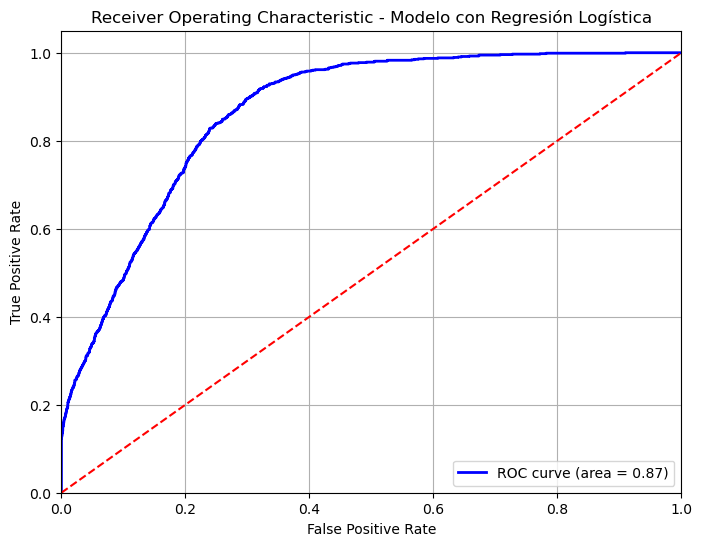

In [88]:
print("\nResultados del Modelo con Regresión Logística en la data testing:")
y_prob_log_test = log_reg_border.predict_proba(X_test)[:, 1]
y_pred_log_test = log_reg_border.predict(X_test)

# Cálculo de métricas
cm_log_test = confusion_matrix(y_test, y_pred_log_test)
sensitivity_log_test = recall_score(y_test, y_pred_log_test, pos_label='PROMOVIDO')
specificity_log_test = cm_log_test[0, 0] / sum(cm_log_test[0, :])
accuracy_log_test = accuracy_score(y_test, y_pred_log_test)
balanced_accuracy_log_test = (sensitivity_log_test + specificity_log_test) / 2
logloss_log_test = log_loss(y_test, y_prob_log_test)

# Cálculo de la curva ROC y AUC
fpr_log_test, tpr_log_test, _ = roc_curve(y_test, y_prob_log_test, pos_label='PROMOVIDO')
roc_auc_log_test = auc(fpr_log_test, tpr_log_test)

# Gráfico de la curva ROC para el Modelo con Regresión Logística
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_test, tpr_log_test, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_log_test))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Modelo con Regresión Logística')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [89]:
# Mostrar métricas
print("Matriz de Confusión:\n", cm_log_test)
print(f"Sensibilidad (test): {sensitivity_log_test:.4f}")
print(f"Especificidad (test): {specificity_log_test:.4f}")
print(f"Accuracy (test): {accuracy_log_test:.4f}")
print(f"Balanced Accuracy (test): {balanced_accuracy_log_test:.4f}")
print(f"Log-Loss (test): {logloss_log_test:.4f}")
print(f"AUC (test): {roc_auc_log_test:.4f}")

Matriz de Confusión:
 [[7825 2203]
 [ 199  735]]
Sensibilidad (test): 0.7869
Especificidad (test): 0.7803
Accuracy (test): 0.7809
Balanced Accuracy (test): 0.7836
Log-Loss (test): 0.4371
AUC (test): 0.8657


### 6.2. Predicción del Modelo K-NN en la data testing


Resultados del Modelo con K-NN en la data testing:


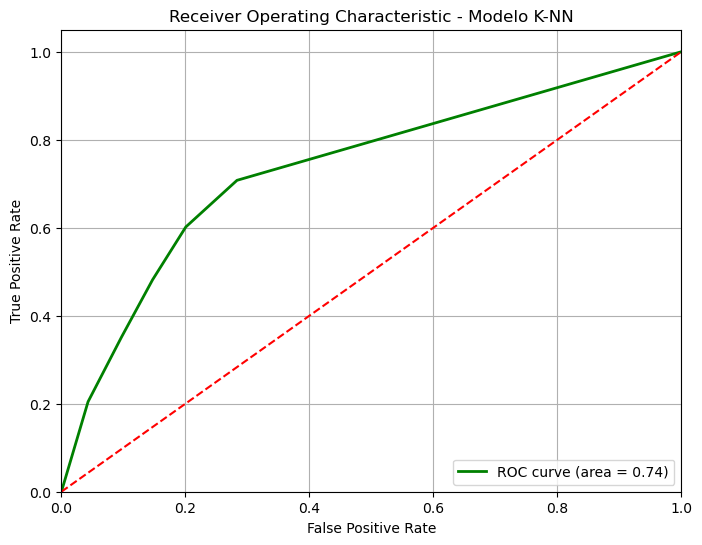

In [90]:
print("\nResultados del Modelo con K-NN en la data testing:")
y_prob_knn_test = knn_border.predict_proba(X_test)[:, 1]
y_pred_knn_test = knn_border.predict(X_test)

# Cálculo de métricas
cm_knn_test = confusion_matrix(y_test, y_pred_knn_test)
sensitivity_knn_test = recall_score(y_test, y_pred_knn_test, pos_label='PROMOVIDO')
specificity_knn_test = cm_knn_test[0, 0] / sum(cm_knn_test[0, :])
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
balanced_accuracy_knn_test = (sensitivity_knn_test + specificity_knn_test) / 2
logloss_knn_test = log_loss(y_test, y_prob_knn_test)

# Cálculo de la curva ROC y AUC
fpr_knn_test, tpr_knn_test, _ = roc_curve(y_test, y_prob_knn_test, pos_label='PROMOVIDO')
roc_auc_knn_test = auc(fpr_knn_test, tpr_knn_test)

# Gráfico de la curva ROC para el Modelo con K-NN
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_test, tpr_knn_test, color='green', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_knn_test))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Modelo K-NN')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [91]:
# Mostrar métricas
print("Matriz de Confusión:\n", cm_knn_test)
print(f"Sensibilidad (test): {sensitivity_knn_test:.4f}")
print(f"Especificidad (test): {specificity_knn_test:.4f}")
print(f"Accuracy (test): {accuracy_knn_test:.4f}")
print(f"Balanced Accuracy (test): {balanced_accuracy_knn_test:.4f}")
print(f"Log-Loss (test): {logloss_knn_test:.4f}")
print(f"AUC (test): {roc_auc_knn_test:.4f}")

Matriz de Confusión:
 [[8553 1475]
 [ 484  450]]
Sensibilidad (test): 0.4818
Especificidad (test): 0.8529
Accuracy (test): 0.8213
Balanced Accuracy (test): 0.6674
Log-Loss (test): 2.5105
AUC (test): 0.7354


### 6.3. Predicción del Modelo Naive Bayes en la data testing


Resultados del Modelo con Naive Bayes en la data testing:


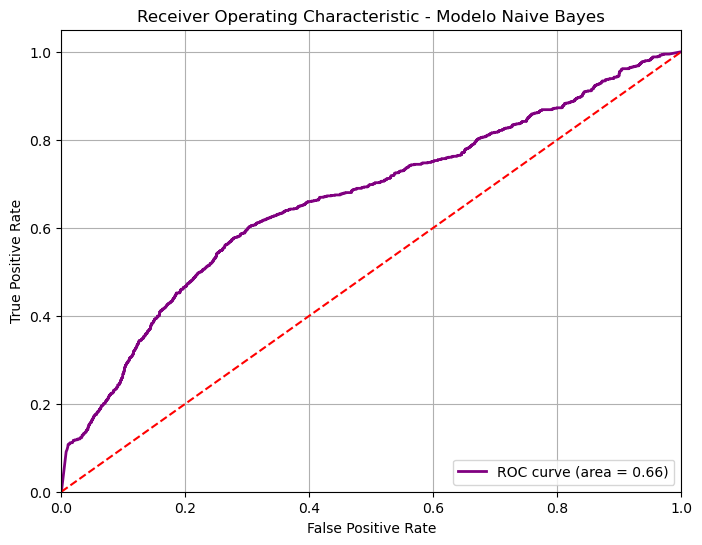

In [92]:
print("\nResultados del Modelo con Naive Bayes en la data testing:")
y_prob_nb_test = nb_border.predict_proba(X_test)[:, 1]
y_pred_nb_test = nb_border.predict(X_test)

# Cálculo de métricas
cm_nb_test = confusion_matrix(y_test, y_pred_nb_test)
sensitivity_nb_test = recall_score(y_test, y_pred_nb_test, pos_label='PROMOVIDO')
specificity_nb_test = cm_nb_test[0, 0] / sum(cm_nb_test[0, :])
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
balanced_accuracy_nb_test = (sensitivity_nb_test + specificity_nb_test) / 2
logloss_nb_test = log_loss(y_test, y_prob_nb_test)

# Cálculo de la curva ROC y AUC
fpr_nb_test, tpr_nb_test, _ = roc_curve(y_test, y_prob_nb_test, pos_label='PROMOVIDO')
roc_auc_nb_test = auc(fpr_nb_test, tpr_nb_test)

# Gráfico de la curva ROC para el Modelo Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb_test, tpr_nb_test, color='purple', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_nb_test))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Modelo Naive Bayes')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [93]:
# Mostrar métricas
print("Matriz de Confusión:\n", cm_nb_test)
print(f"Sensibilidad (test): {sensitivity_nb_test:.4f}")
print(f"Especificidad (test): {specificity_nb_test:.4f}")
print(f"Accuracy (test): {accuracy_nb_test:.4f}")
print(f"Balanced Accuracy (test): {balanced_accuracy_nb_test:.4f}")
print(f"Log-Loss (test): {logloss_nb_test:.4f}")
print(f"AUC (test): {roc_auc_nb_test:.4f}")

Matriz de Confusión:
 [[3389 6639]
 [ 198  736]]
Sensibilidad (test): 0.7880
Especificidad (test): 0.3380
Accuracy (test): 0.3763
Balanced Accuracy (test): 0.5630
Log-Loss (test): 9.3152
AUC (test): 0.6633


## 7. Comparación de las evaluación de los modelos

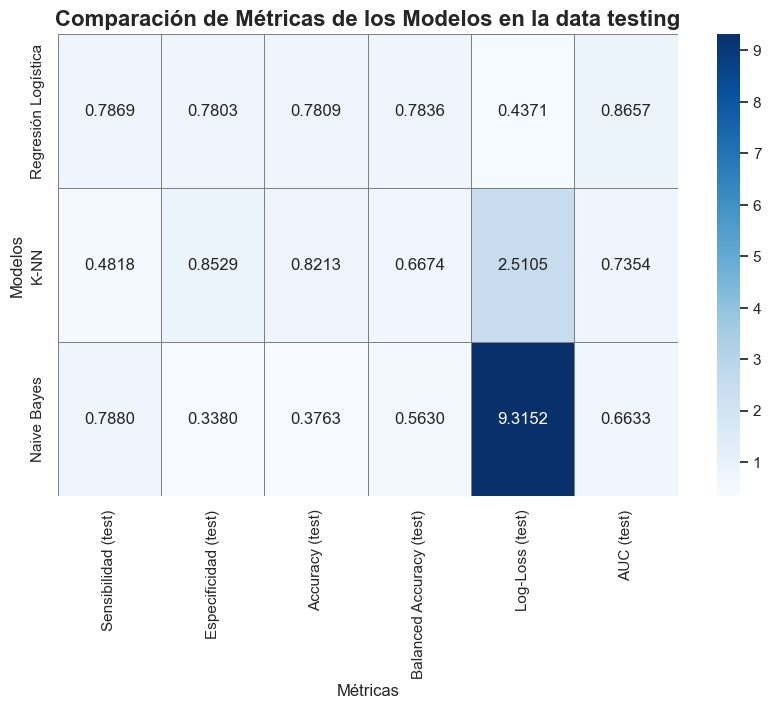

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un diccionario con los resultados de cada modelo
results = {
    'Modelo': ['Regresión Logística', 'K-NN', 'Naive Bayes'],
    'Sensibilidad (test)': [sensitivity_log_test, sensitivity_knn_test, sensitivity_nb_test],
    'Especificidad (test)': [specificity_log_test, specificity_knn_test, specificity_nb_test],
    'Accuracy (test)': [accuracy_log_test, accuracy_knn_test, accuracy_nb_test],
    'Balanced Accuracy (test)': [balanced_accuracy_log_test, balanced_accuracy_knn_test, balanced_accuracy_nb_test],
    'Log-Loss (test)': [logloss_log_test, logloss_knn_test, logloss_nb_test],
    'AUC (test)': [roc_auc_log_test, roc_auc_knn_test, roc_auc_nb_test]
}

# Crear un DataFrame de pandas
results_df = pd.DataFrame(results)

# Configuración para la visualización
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Crear la tabla con seaborn
table = sns.heatmap(results_df.set_index('Modelo'), annot=True, fmt=".4f", cmap='Blues', cbar=True, linewidths=.5, linecolor='gray')

# Personalización de la tabla
table.set_title('Comparación de Métricas de los Modelos en la data testing', fontweight='bold', fontsize=16)
plt.xlabel('Métricas', fontsize=12)
plt.ylabel('Modelos', fontsize=12)  

# Mostrar la tabla
plt.show()

- Gracias al hacer la comparación con las metricas vemos un mejor desempeño con el modelo de Regresión logistica tanto en sus Accuracy y el Balanced Accuracy, si bien en el modelo K-NN tiene un mayor porcentaje en el Accuracy la decición clave esta en el Log-Loss ya que en el modelo de K-NN es muy alto. Por lo tanto usaremos el modelo de Regresión logistica. 